# Boston house price prediction

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- 'RM', 'LSTAT', 'PTRATIO' are the essential features for determining the house price ('MEDV'). The remaining non-relevant features have been excluded.
* RM: rooms; the average number of rooms among homes in the neighborhood
* LSTAT:  the percentage of homeowners in the neighborhood considered "lower class" (working poor)
* PTRATIO: the ratio of students to teachers in primary and secondary schools in the neighborhood
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.


Some considerations:
- Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
- Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
- Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

In [5]:
import pandas as pd
data= pd.read_csv("./housing.csv")
print (data.shape)
data.head()

(489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


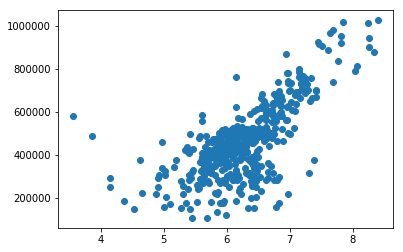

In [7]:
import matplotlib.pyplot as plt
x_RM= data['RM']
y= data['MEDV']
plt.plot(x_RM, y, 'o')

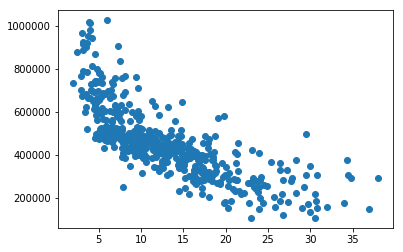

In [8]:
import matplotlib.pyplot as plt
x_LSTAT= data['LSTAT']
y= data['MEDV']
plt.plot(x_LSTAT, y, 'o')

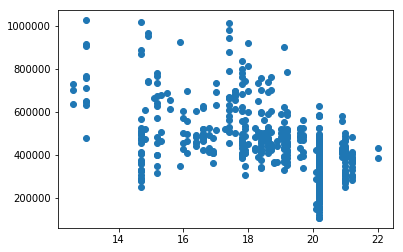

In [9]:
import matplotlib.pyplot as plt
x_PTRATIO= data['PTRATIO']
y= data['MEDV']
plt.plot(x_PTRATIO, y, 'o')

## Some statistics

In [10]:
import numpy as np

# minimum house price in the data
minimum_price= np.min(y)

# maximum house price in the data
maximum_price= np.max(y)

# mean house price in the data
mean_price= np.mean(y)

# median house price in the data
median_price= np.median(y)

# standard deviation of house prices in the data
std_price= np.std(y)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Splitting the data into training and test data

Our next step requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we will need to implement the following:

- Use train_test_split from sklearn.model_selection to shuffle and split the features and prices data into training and testing sets.

- Split the data into 80% training and 20% testing.

- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [46]:
from sklearn import model_selection
features= data.drop('MEDV', axis= 1)  # axis= 1 <=> column
features.head()
print (features.shape)
X_train, X_test, y_train, y_test= model_selection.train_test_split(features, y, test_size= 0.2)
print()
print (X_train.shape)
print (X_train.head())
print()
print (y_train.shape)
print (y_train.head())

print()
print (X_test.shape)
print (X_test.head())
print()
print (y_test.shape)
print (y_test.head())

(489, 3)

(391, 3)
        RM  LSTAT  PTRATIO
372  5.390  20.85     20.2
373  5.713  17.11     20.2
425  6.219  16.59     20.2
14   6.096  10.26     21.0
429  6.341  17.79     20.2

(391,)
372    241500.0
373    317100.0
425    386400.0
14     382200.0
429    312900.0
Name: MEDV, dtype: float64

(98, 3)
        RM  LSTAT  PTRATIO
371  4.880  30.62     20.2
462  6.229  13.11     20.2
125  5.986  14.81     19.1
280  7.148   3.56     19.2
274  6.453   8.23     15.3

(98,)
371    214200.0
462    449400.0
125    449400.0
280    783300.0
274    462000.0
Name: MEDV, dtype: float64


## LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.7205309162036586

In [19]:
regressor.score(X_test, y_test)

0.7037993056755759

In [20]:
regressor.predict([[7.0, 5.0, 18.8]])

array([599185.73769488])

## DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(max_depth= 5)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.8935875621436861

sklearn documentation: The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [48]:
regressor.score(X_test, y_test)

0.7825058650067537

In [49]:
regressor.predict([[7.0, 5.0, 18.8]])

array([706188.])

In [50]:
regressor.feature_importances_

array([0.31787942, 0.63328036, 0.04884022])

In [63]:
for index, rec in X_test.iterrows():
    print (index)
    print (rec)
    print ("actual house price:    $ {:,.2f}".format(y[index]))
    #print ("predicted house price: $ " + str(regressor.predict([rec])[0]))
    print ("predicted house price: $ {:,.2f}".format(regressor.predict([rec])[0]))
    print ("-----------------------------------")

371
RM          4.88
LSTAT      30.62
PTRATIO    20.20
Name: 371, dtype: float64
actual house price:    $ 214,200.00
predicted house price: $ 196,827.27
-----------------------------------
462
RM          6.229
LSTAT      13.110
PTRATIO    20.200
Name: 462, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 439,441.94
-----------------------------------
125
RM          5.986
LSTAT      14.810
PTRATIO    19.100
Name: 125, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 434,595.00
-----------------------------------
280
RM          7.148
LSTAT       3.560
PTRATIO    19.200
Name: 280, dtype: float64
actual house price:    $ 783,300.00
predicted house price: $ 513,450.00
-----------------------------------
274
RM          6.453
LSTAT       8.230
PTRATIO    15.300
Name: 274, dtype: float64
actual house price:    $ 462,000.00
predicted house price: $ 501,480.00
-----------------------------------
245
RM          8.259
LSTAT       3.540
PTR

## RandomForestRegressor—usually the best choice!

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(max_depth= 5)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.8958650961653779

In [66]:
regressor.score(X_test, y_test)

0.8702191509016142

In [67]:
regressor.predict([[7.0, 5.0, 18.8]])

array([683582.73641304])

In [68]:
regressor.feature_importances_

array([0.32465519, 0.61519894, 0.06014587])

In [69]:
for index, rec in X_test.iterrows():
    print (index)
    print (rec)
    print ("actual house price:    $ {:,.2f}".format(y[index]))
    #print ("predicted house price: $ " + str(regressor.predict([rec])[0]))
    print ("predicted house price: $ {:,.2f}".format(regressor.predict([rec])[0]))
    print ("-----------------------------------")

371
RM          4.88
LSTAT      30.62
PTRATIO    20.20
Name: 371, dtype: float64
actual house price:    $ 214,200.00
predicted house price: $ 210,642.32
-----------------------------------
462
RM          6.229
LSTAT      13.110
PTRATIO    20.200
Name: 462, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 438,342.63
-----------------------------------
125
RM          5.986
LSTAT      14.810
PTRATIO    19.100
Name: 125, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 414,743.31
-----------------------------------
280
RM          7.148
LSTAT       3.560
PTRATIO    19.200
Name: 280, dtype: float64
actual house price:    $ 783,300.00
predicted house price: $ 707,281.03
-----------------------------------
274
RM          6.453
LSTAT       8.230
PTRATIO    15.300
Name: 274, dtype: float64
actual house price:    $ 462,000.00
predicted house price: $ 481,901.55
-----------------------------------
245
RM          8.259
LSTAT       3.540
PTR

## RandomForestRegressor works also well without data splitting

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(max_depth= 5)
regressor.fit(features, y)
regressor.score(features, y)

0.8985781053419315

In [71]:
regressor.predict([[7.0, 5.0, 18.8]])

array([706766.5270687])

In [72]:
regressor.feature_importances_

array([0.47741277, 0.46773975, 0.05484748])

In [73]:
for index, rec in X_test.iterrows():
    print (index)
    print (rec)
    print ("actual house price:    $ {:,.2f}".format(y[index]))
    #print ("predicted house price: $ " + str(regressor.predict([rec])[0]))
    print ("predicted house price: $ {:,.2f}".format(regressor.predict([rec])[0]))
    print ("-----------------------------------")

371
RM          4.88
LSTAT      30.62
PTRATIO    20.20
Name: 371, dtype: float64
actual house price:    $ 214,200.00
predicted house price: $ 204,202.17
-----------------------------------
462
RM          6.229
LSTAT      13.110
PTRATIO    20.200
Name: 462, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 428,968.05
-----------------------------------
125
RM          5.986
LSTAT      14.810
PTRATIO    19.100
Name: 125, dtype: float64
actual house price:    $ 449,400.00
predicted house price: $ 415,981.77
-----------------------------------
280
RM          7.148
LSTAT       3.560
PTRATIO    19.200
Name: 280, dtype: float64
actual house price:    $ 783,300.00
predicted house price: $ 712,022.78
-----------------------------------
274
RM          6.453
LSTAT       8.230
PTRATIO    15.300
Name: 274, dtype: float64
actual house price:    $ 462,000.00
predicted house price: $ 487,398.69
-----------------------------------
245
RM          8.259
LSTAT       3.540
PTR